In [63]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# DELETE LATER
# https://www.kaggle.com/jonaspalucibarbosa/telco-customer-churn-eda-predictions-shap/notebook

### Load data

In [42]:
df = pd.read_csv("telco_churn.csv")

In [47]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [45]:
# Check if there are nulls
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Data Cleaning

In [54]:
# TotalCharges

# Changing from object to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].dtype

# Some missing values appear
df['TotalCharges'].isnull().sum()

# Check if missing values are zeros
print(df[df['tenure'].isin([0])].index)
print(df[df['TotalCharges'].isna()].index)

# Replace missing values with zeros
df.loc[:,'TotalCharges'] = df.loc[:,'TotalCharges'].replace(np.nan,0)
df['TotalCharges'].isnull().sum()

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')
Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')


0

In [55]:
# SeniorCitizen

# Change from numbers to string
df['SeniorCitizen'] = df['SeniorCitizen'].apply(str)
senior_map = {'0': 'No', '1': 'Yes'}
df['SeniorCitizen'] = df['SeniorCitizen'].map(senior_map)

In [57]:
for i in df.select_dtypes('object').columns:
    print(i, '\n')
    print(df[i].value_counts(),'\n')

customerID 

9975-GPKZU    1
6583-KQJLK    1
4660-IRIBM    1
4958-GZWIY    1
5360-XGYAZ    1
             ..
3441-CGZJH    1
2000-MPKCA    1
3643-AHCFP    1
0613-WUXUM    1
3566-HJGPK    1
Name: customerID, Length: 7043, dtype: int64 

gender 

Male      3555
Female    3488
Name: gender, dtype: int64 

SeniorCitizen 

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64 

Partner 

No     3641
Yes    3402
Name: Partner, dtype: int64 

Dependents 

No     4933
Yes    2110
Name: Dependents, dtype: int64 

PhoneService 

Yes    6361
No      682
Name: PhoneService, dtype: int64 

MultipleLines 

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

InternetService 

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 

OnlineSecurity 

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64 

OnlineBackup 

No              

### EDA

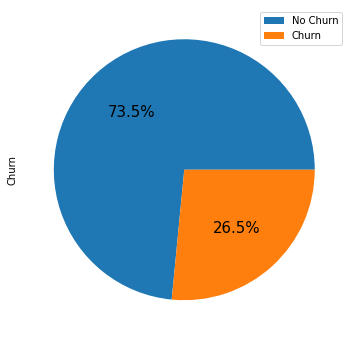

In [85]:
# Churn

plt.figure(figsize=(14,6))

df['Churn'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', textprops = {"fontsize":15})

plt.legend(labels=['No Churn', 'Churn'])
plt.show()

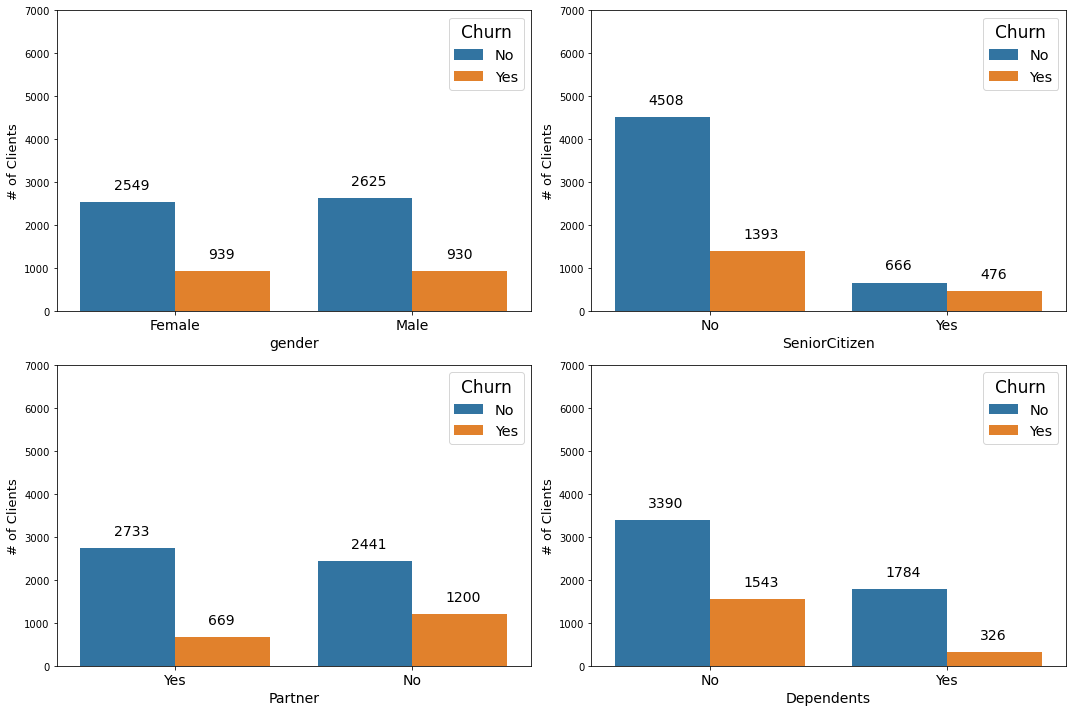

In [91]:
# Demographics features

demo_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

plt.figure(figsize=(15,10))

for i,col in enumerate(demo_features):    
    plt.subplot(2,2,i + 1)
    
    ax = sns.countplot(data = df, x = col, hue="Churn")

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# of Clients", fontsize= 13)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 14)
    
    plt.legend(title = 'Churn', fontsize='x-large', title_fontsize='17')
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.14, p.get_height()+300), fontsize= 14)

plt.tight_layout()

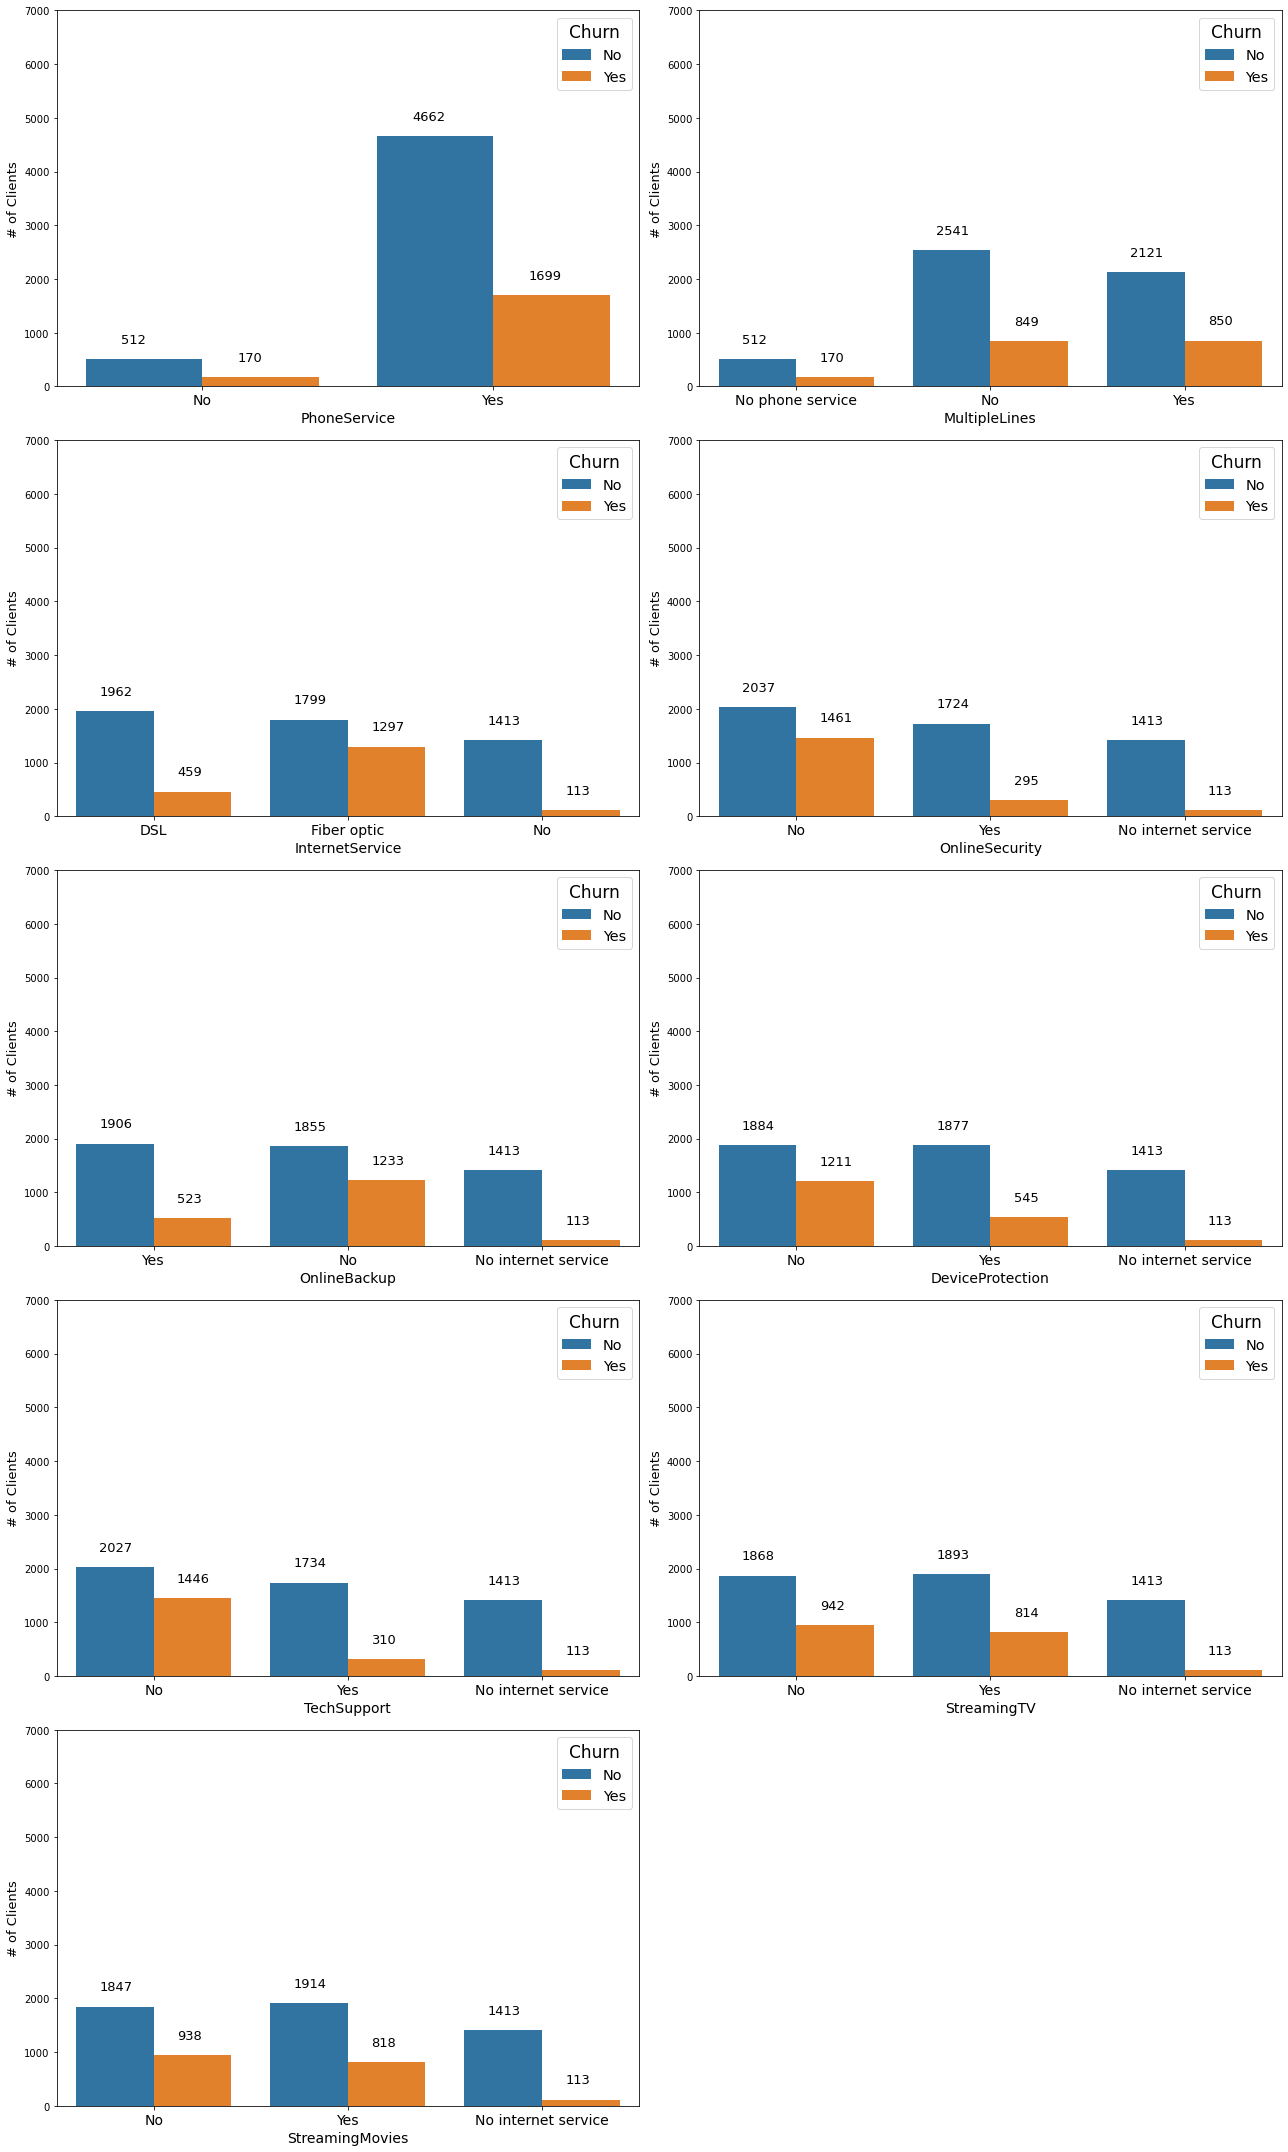

In [96]:
# Service features

service_features = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup'
                  , 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


plt.figure(figsize=(18,30))

for i,col in enumerate(service_features):    
    plt.subplot(5,2,i + 1)
    
    ax = sns.countplot(data = df, x = col, hue="Churn")

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# of Clients", fontsize= 13)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 14)
    
    plt.legend(title = 'Churn', fontsize='x-large', title_fontsize='17')

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+300), fontsize= 13)

plt.tight_layout()

In [ ]:
# Account information features

acc_info = ['Contract', 'PaperlessBilling', 'PaymentMethod']

plt.figure(figsize=(12,15))

for i,col in enumerate(acc_info):    
    plt.subplot(3,1,i + 1)
    
    ax = sns.countplot(data = df, x = col, hue="Churn", palette = 'rocket')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# of Clients", fontsize= 13)
    plt.ylim(0,5000)
    plt.xticks(fontsize= 13)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.135, p.get_height()+300), fontsize= 14)

plt.tight_layout()

plt.show()